## This notebook describes my imputation procedure for filling in missing values in my edge properties.

In [194]:
# Imports and miscellany

import csv
import math
import pickle
import string
import inventoryCleaner as iC
import networkx as nx
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

# Helper functions

def representsInt(s):
    try: 
        int(s)
        return True
    except ValueError:
        return False

def buildRange(x):
    result = []
    if pd.isnull(x)==True:
        return np.nan
    for part in x.split(','):
        if '-' in part:
            a, b = part.split('-')
            if (representsInt(a)==False):
                strarr = []
                for i in range(ord(a), ord(b)+1):
                    strarr.append(chr(i))
                result.extend(strarr)
            else:
                a, b = int(a), int(b)
                result.extend(range(a, b + 1))
        else:
            if (RepresentsInt(part)==False):
                result.append(part)
            else:
                a = int(part)
                result.append(a)
    return result

def existin(x):
    r = reqs[reqs['Variable']==x]['Reasonable range']
    if 
    return reqs[reqs['Variable']==x]['Reasonable range'].tolist()

In [100]:
# The first step is to bring in a CSV full of properties and requirements for my data set. 

############### I NEED TO CORRECT THE EMPTY REQUIREMENTS FIELDS!


pathtoreqs = '/home/louisf/Documents/Insight/massdriver/docs/road_inventory_params.csv'
reqs = pd.read_csv(pathtoreqs, delimiter = '^')

In [101]:
# Do a little bit of cleaning to convert some stuff and drop some rows
reqs['Reasonable range'] = reqs['Reasonable range'].map(buildRange)
reqs = reqs[reqs['Disqualify']==False]

In [104]:
# Load in my database 
fpath = '/home/louisf/Documents/Insight/massdriver/data/raw/shapefile/RoadInventory.geojson'
pdinv = iC.PDInventory('roadInventory', 'test')
pdinv.geojsontodf(fpath)

toy = pdinv.table
for colname in toy.columns:
    if (sum(colname==reqs['Variable'])!=1):
        toy.drop(colname, inplace=True, axis=1)
        


481459
481459
481459
481456
481459
0
481459
372839
370800
41938
414111
1550
481459
481459
2011
0
481459
481459
481459
481453
481459
481459
481459
481459
367904
36365
16501
481459
481459
73838
370777
369296
371509
481459
53949
414059
481459
2314
481459
481459
476462
481451


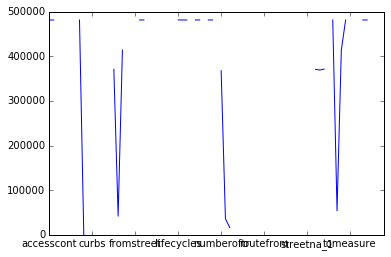

In [256]:
# Check on how many of the remaining features exceed some threshold of in-range values.

df = pd.DataFrame(index=toy.columns,columns=['value'])

for colname in toy.columns:
    nrange = existin(colname)[0]
    if type(nrange)!=float:
        df.loc[colname]= sum(toy[colname].isin(nrange))



In [267]:
reqs['Reasonable range']

0                                             [0, 1, 2]
1                [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
2                                                   NaN
3                                    [0, 1, 2, 3, 4, 5]
5                                                   NaN
6                                             [0, 1, 2]
7                                                   NaN
8     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
9            [A, B, C, D, E, F, G, H, I, J, K, L, M, N]
10                                                  NaN
11                                   [0, 1, 2, 3, 4, 5]
13                                                  NaN
14                                                  NaN
15              [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
16                                                  NaN
17                                [1, 2, 3, 4, 5, 6, 7]
18    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
19                                   [1, 2, 3, 4

In [253]:
df

,value
accesscont,481459
addedroadt,NaN
adt,NaN
adtderivat,NaN
adtyear,NaN
assigned_1,NaN
assignedle,NaN
city,NaN
county,NaN
crn,NaN


In [217]:
reqs["Reasonable range"]

0                                             [0, 1, 2]
1                [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
2                                                   NaN
3                                    [0, 1, 2, 3, 4, 5]
5                                                   NaN
6                                             [0, 1, 2]
7                                                   NaN
8     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
9            [A, B, C, D, E, F, G, H, I, J, K, L, M, N]
10                                                  NaN
11                                   [0, 1, 2, 3, 4, 5]
13                                                  NaN
14                                                  NaN
15              [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
16                                                  NaN
17                                [1, 2, 3, 4, 5, 6, 7]
18    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
19                                   [1, 2, 3, 4

In [92]:
# Next, I will load in my graph. I will use the pickle I generated previously.

ValueError: labels [False False  True False False False False False False False  True False
 False False False False False False False False False False  True False
  True False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False  True  True False False False False  True False
 False False False False False False False False False False  True False
 False False False False False False False False False False False False
 False False] not contained in axis

In [91]:
# Iterate over each edge. Find the properties on that edge that are missing. 
reqs

,Variable,Data type,Categorical,Required,Identifier,Disqualify,DQ reason,Reasonable range,Description
2,adt,int64,False,False,False,False,NaN,NaN,Average annual daily traffic
3,adtderivat,int64,True,False,False,False,NaN,0-5,How ADT is derived
4,adtstation,int64,True,False,True,True,Station identifier,NaN,ADT count station location number
5,adtyear,int64,True,False,False,False,NaN,NaN,Year of ADT collection
6,assigned_1,int64,True,True,False,False,NaN,0-2,Defines the source of the assigned length value
7,assignedle,float64,False,True,False,False,NaN,NaN,Segment length in miles
8,city,int64,True,True,False,False,NaN,1-351,city names; link up with other names?
9,county,string,True,True,False,False,NaN,A-N,NaN
10,crn,string,False,True,True,False,NaN,NaN,An unique identifier combining county code and...
11,curbs,int64,True,False,False,False,NaN,0-5,Curb type identifier


In [ ]:
# For each node on the edge, find the properties of the edges attached to that node.

In [ ]:
# Find all properties that are with an acceptable range within that set, and use those to impute missing value.